In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Handle missing values (if any) only in numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [ ]:
df['NPK_sum'] = df['N'] + df['P'] + df['K']

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,NPK_sum
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,152.063636
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,79.918669
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,17.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,94.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,146.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,179.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,385.000000


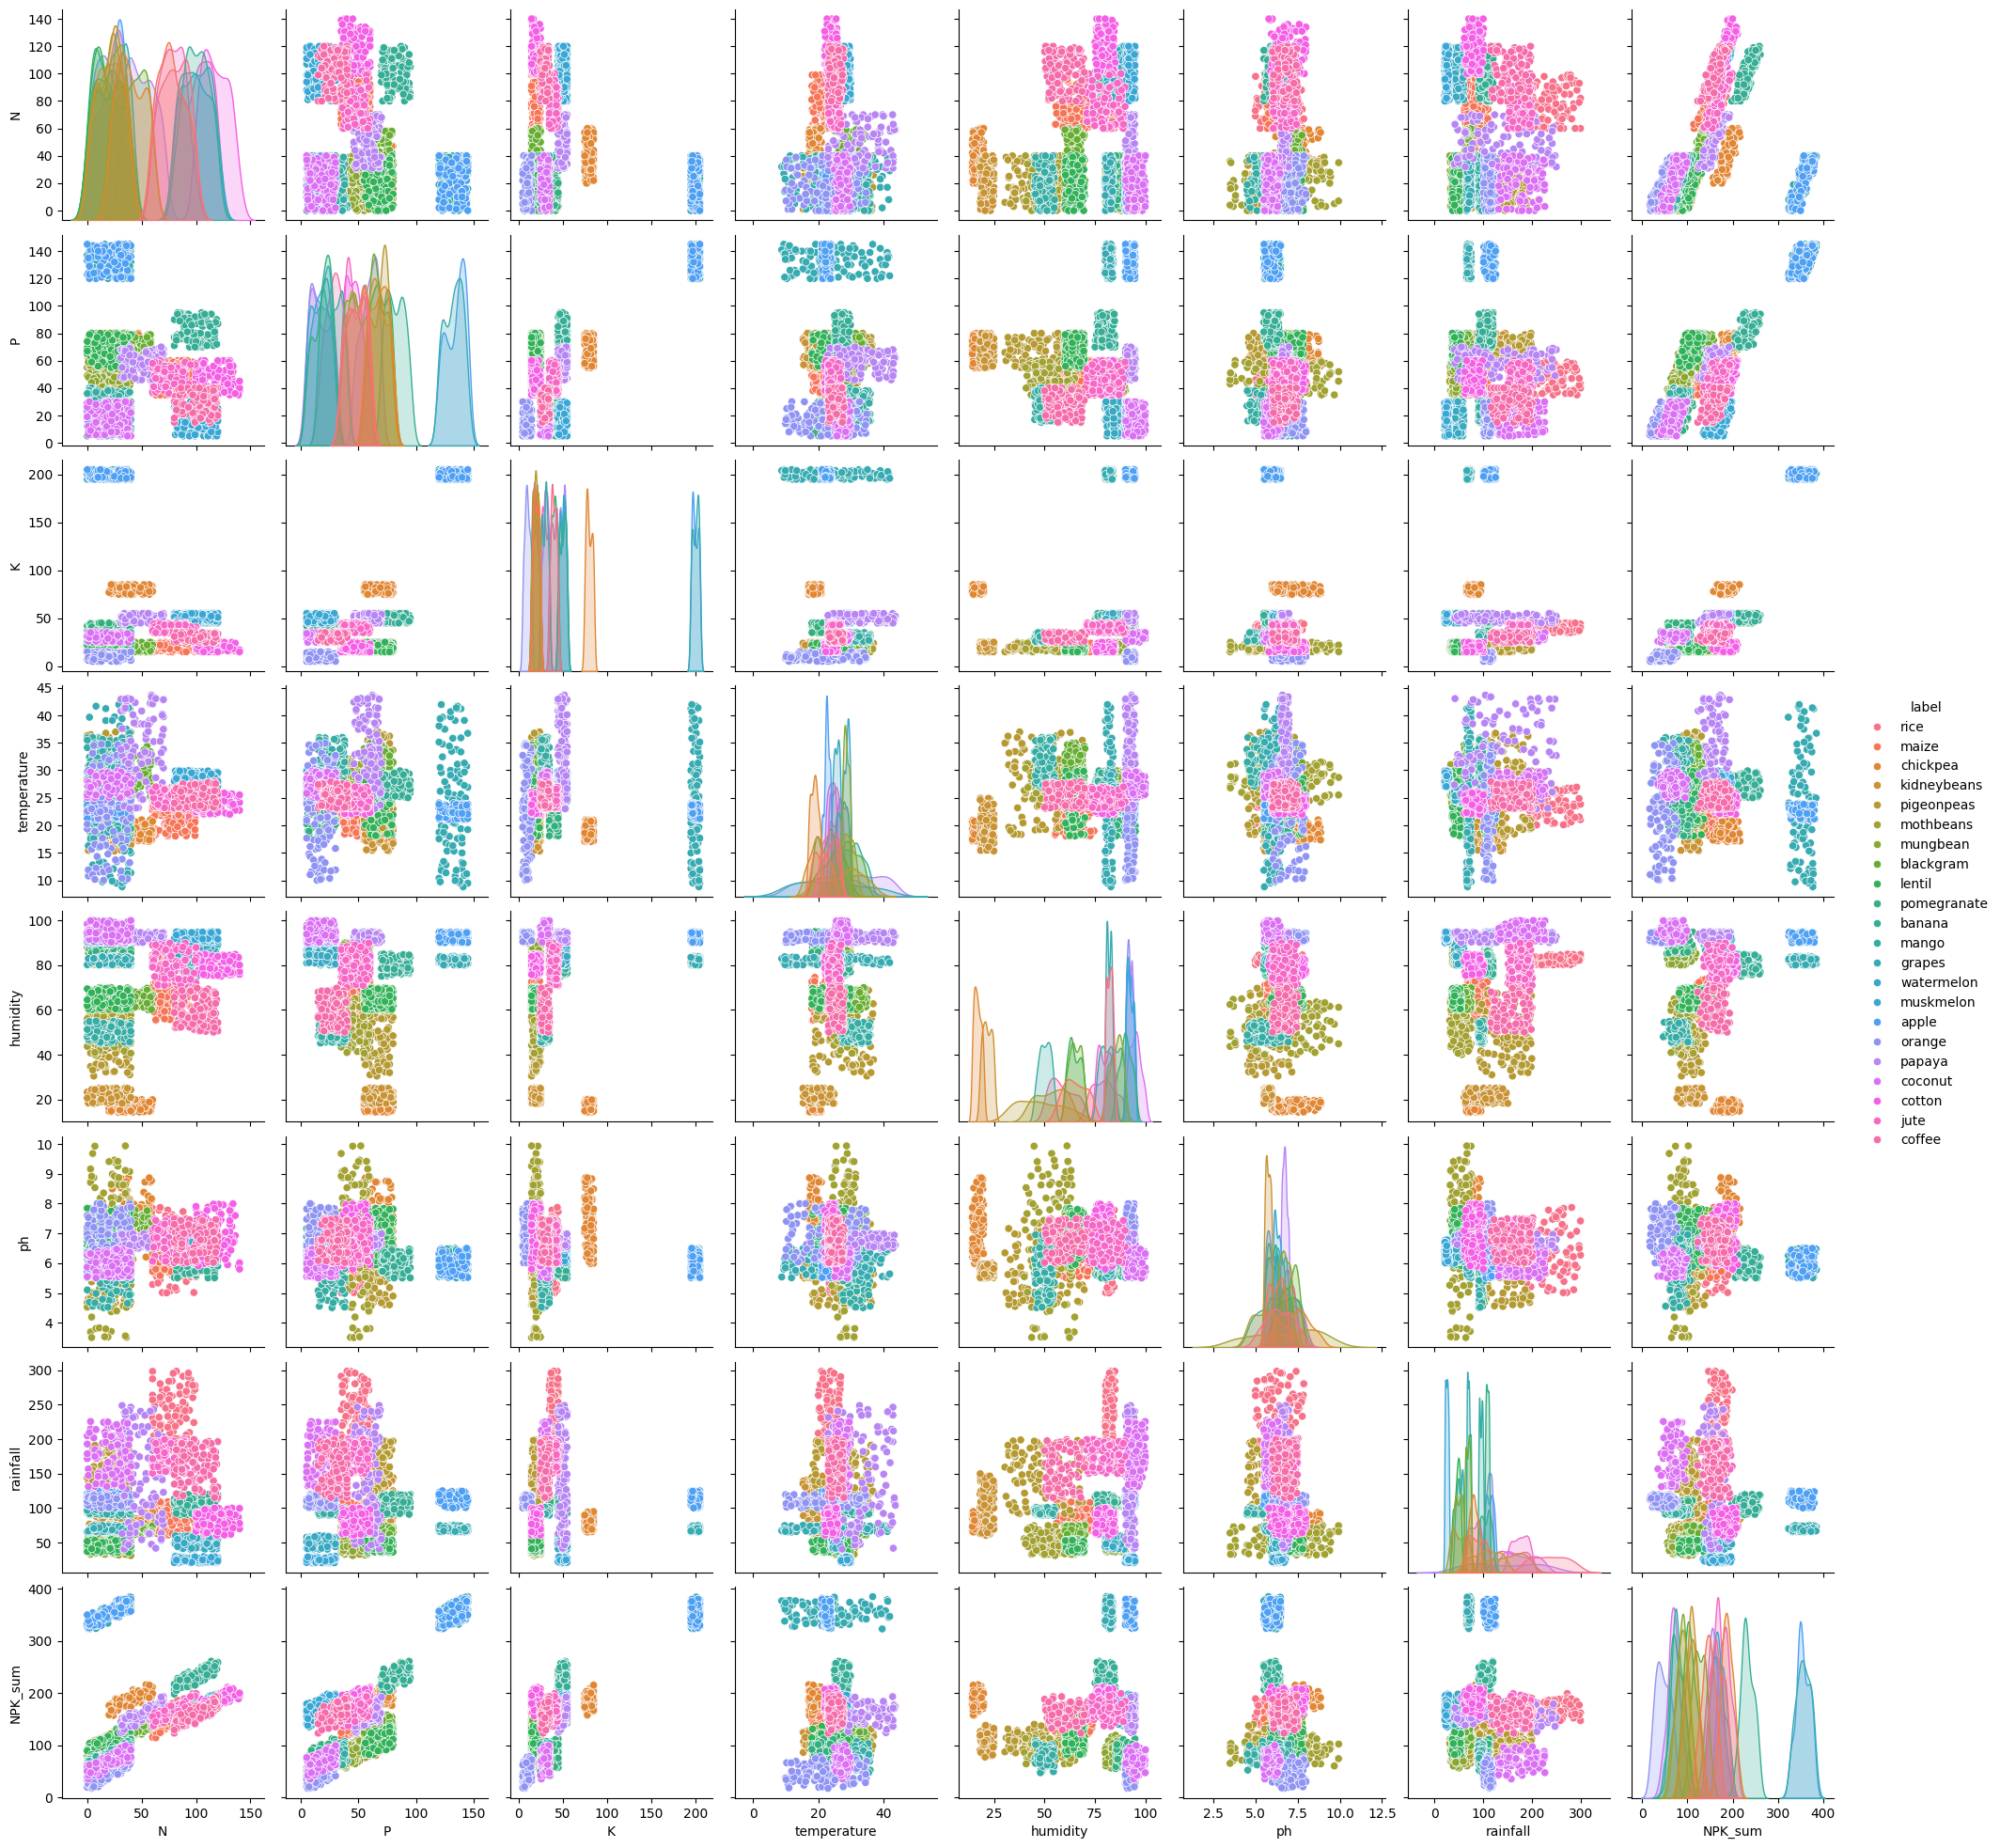

In [ ]:
sns.pairplot(df,hue='label')
plt.show()

In [ ]:
X=df.drop(["label"],axis=1)
y=df['label']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall','NPK_sum']
X[features] = scaler.fit_transform(X[features])


In [ ]:
X.head()


,N,P,K,temperature,humidity,ph,rainfall,NPK_sum
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,0.287062
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,0.399702
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,0.086813
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,-0.038343
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,0.124359


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Crop labels


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        1

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9949999999999999


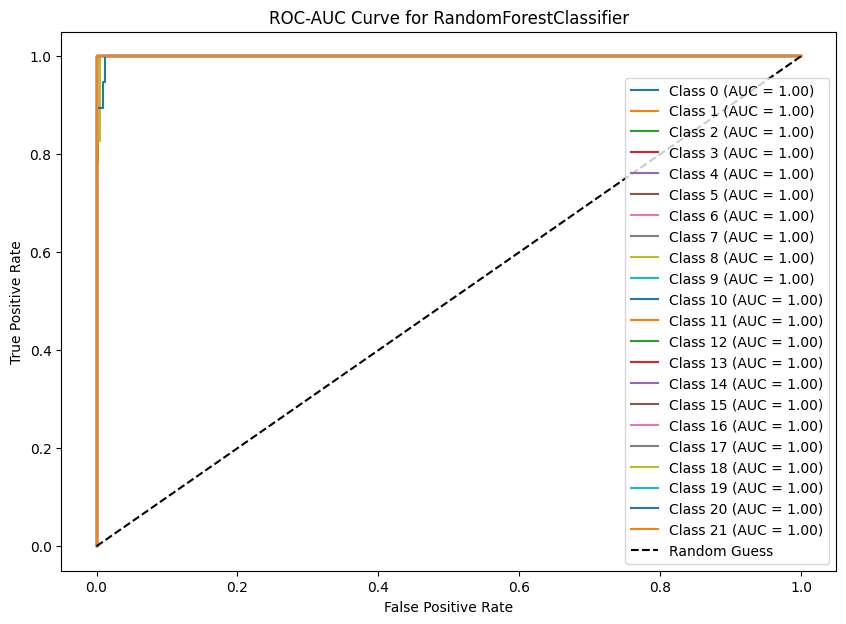

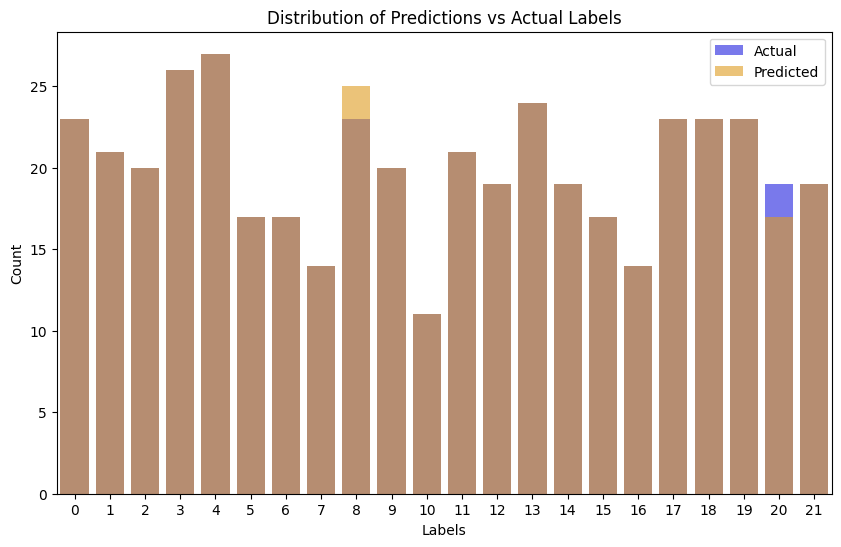

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Get model probabilities
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test_binarized.shape[1]
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for RandomForestClassifier")
plt.legend(loc="lower right")
plt.show()

# Distribution of Predictions vs Actual Labels
import seaborn as sns

# Count plot for predictions vs actual
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, label="Actual", color="blue", alpha=0.6)
sns.countplot(x=y_pred, label="Predicted", color="orange", alpha=0.6)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Predictions vs Actual Labels")
plt.legend()
plt.show()


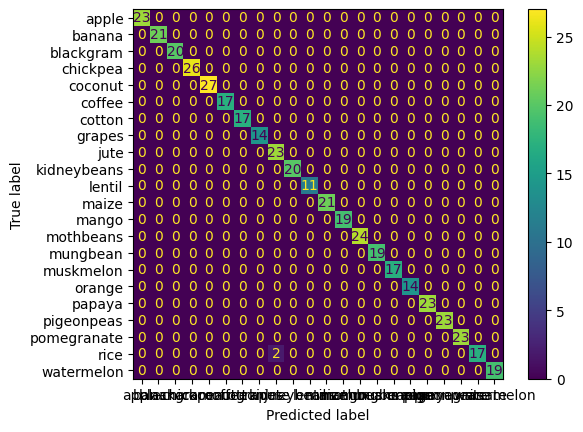

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="viridis")


In [ ]:
import pandas as pd

feature_importance = model.feature_importances_
feature_names = X.columns

# Sort features by importance
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(features_df)



       Feature  Importance
4     humidity    0.207602
6     rainfall    0.205164
2            K    0.162993
1            P    0.122879
7      NPK_sum    0.098002
0            N    0.086899
3  temperature    0.068780
5           ph    0.047681


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9818181818181818
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.98        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.88      0.96      0.92        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00 

In [ ]:

top_features = features_df.head(5)['Feature'].tolist()
X_selected = X[top_features]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9613636363636363
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.90      0.95      0.93        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
        

In [ ]:

import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

joblib.dump(model,'random_forest.pkl')


['random_forest.pkl']